> **提示**：欢迎参加“调查数据集”项目！引用段会添加这类提示，来帮助你制定调查方法。在你提交项目之前，你可以浏览一下报告，将这一段删除，以保持报告的简洁性。首先，你需要双击该 Markdown 框(cell)，将标题更改为与数据集和调查相关的标题。

# 项目：TMDb电影数据

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在报告的这一部分，你需要首先对已选择进行分析的数据集进行简要的介绍。在这一部分末尾，对你计划在报告过程中探索的问题进行描述。你需要建立至少包含一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，请务必先熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

### 导入数据包及可视化包

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import numpy as np
import pandas as pd
import json
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。


### 加载数据

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('tmdb-movies.csv')

### 观察数据结构

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### 检查数据类型，观察是否有缺失值

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### 处理缺失值：根据要分析的内容，对keywords,genres列进行缺失值的填充

In [5]:
df.keywords = df.keywords.fillna('keywords')

In [6]:
df.genres = df.genres.fillna('genres')

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1（票房前十名的导演是哪些? ）

先计算各导演每部电影的平均票房，再进行排序，取前十位

Text(0.5,0,'revenue')

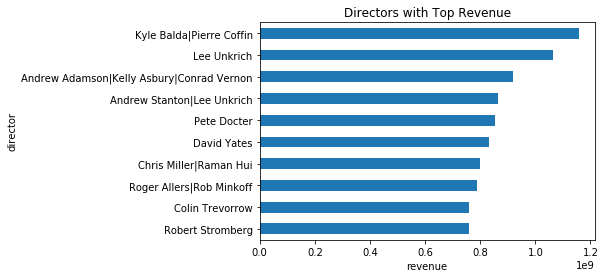

In [7]:
revenue_of_director = df.groupby('director').revenue.mean() 
revenue_of_director.sort_values().tail(10).plot(kind='barh', title='Directors with Top Revenue')
plt.xlabel('revenue')

### 研究问题 2（哪些因素会影响电影的票房成绩?）

In [8]:
df[['budget', 'popularity', 'release_date', 'runtime', 'vote_average', 'vote_count', 'revenue']].corr()

,budget,popularity,runtime,vote_average,vote_count,revenue
budget,1.000000,0.545472,0.191283,0.081014,0.632702,0.734901
popularity,0.545472,1.000000,0.139033,0.209511,0.800828,0.663358
runtime,0.191283,0.139033,1.000000,0.156835,0.163278,0.162838
vote_average,0.081014,0.209511,0.156835,1.000000,0.253823,0.172564
vote_count,0.632702,0.800828,0.163278,0.253823,1.000000,0.791175
revenue,0.734901,0.663358,0.162838,0.172564,0.791175,1.000000


In [9]:
#创建票房收入相关因素数据框
revenue_corr = df[['budget', 'popularity', 'vote_count', 'revenue']]
fig = plt.figure(figsize = (15, 10))

Text(0,0.5,'revenue')

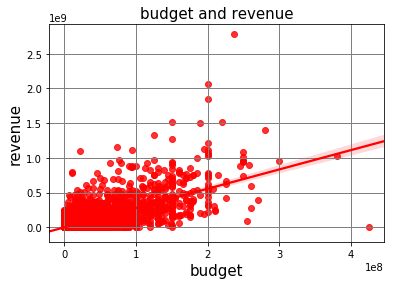

In [15]:
#绘制电影预算与电影票房相关散点图
pic1 = sns.regplot(x = 'budget', y = 'revenue', data = revenue_corr, x_jitter = .1, color = 'r')
plt.grid(True, linestyle = "-", color = "grey", linewidth = "1")
plt.title('budget and revenue', fontsize = 15)
plt.xlabel('budget', fontsize = 15)
plt.ylabel('revenue', fontsize = 15)

Text(0,0.5,'revenue')

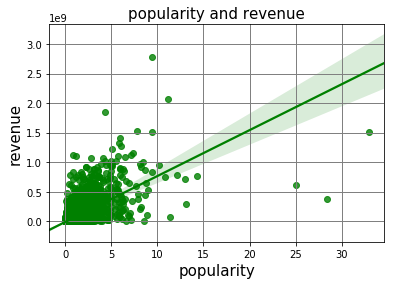

In [16]:
#绘制电影预算与受欢迎度相关散点图
pic2 = sns.regplot(x = 'popularity', y = 'revenue', data = revenue_corr, x_jitter = .1, color = 'g')
plt.grid(True, linestyle = "-", color = "grey", linewidth = "1")
plt.title('popularity and revenue', fontsize = 15)
plt.xlabel('popularity', fontsize = 15)
plt.ylabel('revenue', fontsize = 15)

Text(0,0.5,'revenue')

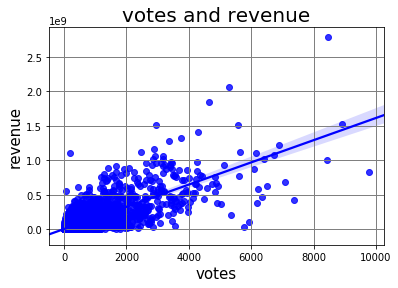

In [17]:
#绘制电影预算与电影票房相关散点图
pic3 = sns.regplot(x = 'vote_count', y = 'revenue', data = revenue_corr, x_jitter = .1, color = 'blue')
plt.grid(True, linestyle = "-", color = "grey", linewidth = "1")
plt.title('votes and revenue', fontsize = 20)
plt.xlabel('votes', fontsize = 15)
plt.ylabel('revenue', fontsize = 15)

### 研究问题 3（电影的关键字分析）

提取电影关键字列表keywords_list

In [15]:
keywords_list = []
for x in df['keywords']:
    keywords_list.append(x)
keywords_list = ''.join(keywords_list)
keywords_list.replace('\'s', '')

"monster|dna|tyrannosaurus rex|velociraptor|islandfuture|chase|post-apocalyptic|dystopia|australiabased on novel|revolution|dystopia|sequel|dystopic futureandroid|spaceship|jedi|space opera|3dcar race|speed|revenge|suspense|carfather-son relationship|rape|based on novel|mountains|wintersaving the world|artificial intelligence|cyborg|killer robot|futurebased on novel|mars|nasa|isolation|botanistassistant|aftercreditsstinger|duringcreditsstinger|evil mastermind|minionsdream|cartoon|imaginary friend|animation|kidspy|based on novel|secret agent|sequel|james bondjupiter|space|woman director|3d|interspecies romancedancing|artificial intelligence|helicopter|distrust|isolationvideo game|nerd|alien attack|3d|pixelsmarvel comic|comic|sequel|superhero|visionbounty hunter|wyoming|mountains|hangman|voice over narrationrevenge|murder|on the run|fugitive|framedmarvel comic|superhero|aftercreditsstinger|duringcreditsstinger|marvel cinematic universecinderella|magic|fairy tale|princess|shoerevolution|s

通过wordcloud生成词云图

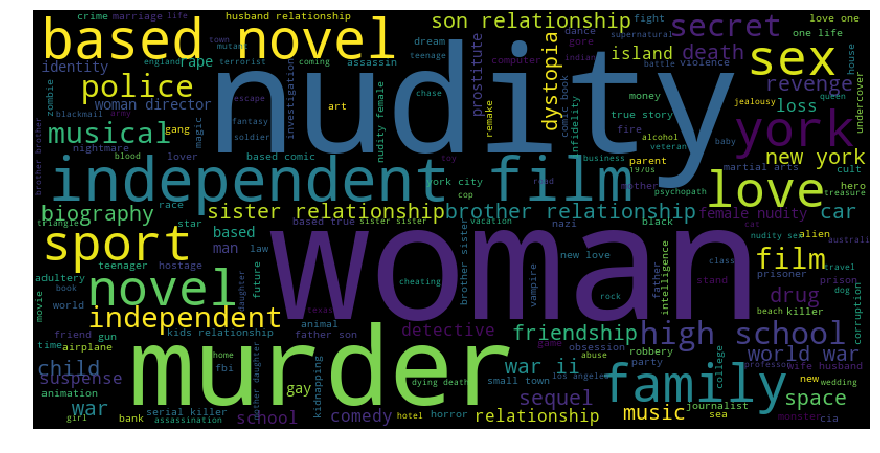

In [16]:
wordcloud = WordCloud(background_color = 'black', max_words = 5000, scale = 2).generate(keywords_list)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<a id='conclusions'></a>
## 结论
    由散点图可以看出，电影制作的预算与票房呈正相关，预算越充足，电影越容易获得高票房；同时根据词云图可以看出这三类电影题材最受观众喜爱：woman，nudity，murder。同时由于原数据文件中，keywords一项存在一定量的缺失值，在进行keywords分析时并未将这些缺失值归为其他关键字，而是变相将其舍弃，而这一部分中可能仍然会包含排名靠前的关键字，因此会对整个词云图热度最高的关键字的分布显示会有一定影响，但整体来说，最受欢迎的关键字（电影题材）并不会有太大偏差。

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

> **提示**：如果你对自己的研究成果感到满意，应将其副本保存为 HTML 或 PDF 形式。在导出报告之前请检查一遍，确保报告结构完整，信息连贯。应删除所有类似的“提示”引用段，以保持报告中的简洁度。在提交之前，你还需要查看在课程结尾的项目提交页面中的项目审阅规范。

> 如需将报告导出到工作区，你可以运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，来提交你的项目。恭喜你！

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])